# 🚀 **Spaceship Titanic** 🏆

Realized by : **FARAZ ANSARI**

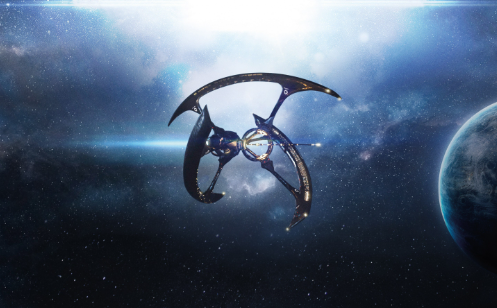

Welcome to this comprehensive guide on **binary classification** with the **Spaceship Titanic** dataset. The objective is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with a spacetime anomaly

**Overview:**

        
Features:
*   PassengerId: A unique id for each passenger
*   HomePlanet: The planet the passenger departed from.
*   CryoSleep: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.
*   Cabin: The cabin number where the passenger is staying.
*   Destination: The planet the passenger will be debarking to.
*   Age: The age of the passenger.
*   VIP: Whether the passenger has paid for special VIP service during the voyage.
*   RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
*   Name: The first and last names of the passenger.
*   Y : Whether the passenger was transported to another dimension



In [395]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [396]:
# load the data
data = pd.read_csv('/content/train.csv')

In [397]:
# size of data
data.shape

(8693, 14)

In [398]:
# view first few entries of data
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [399]:
# view last few entries of data
data .tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [400]:
# check for duplicates
hu=data.duplicated().sum()
print('Total Number of duplicates in data:',hu)

Total Number of duplicates in data: 0


In [401]:
# check more info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [402]:
# check for missing values
data.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [403]:
# columns data types
data.dtypes

,0
PassengerId,object
HomePlanet,object
CryoSleep,object
Cabin,object
Destination,object
Age,float64
VIP,object
RoomService,float64
FoodCourt,float64
ShoppingMall,float64


In [404]:
# unique values in each columns
for col in data:
  print(f'Name of the columns :{col}')
  print(f'unique number of values in columns :{data[col].nunique()}')
  print('-'*40)

Name of the columns :PassengerId
unique number of values in columns :8693
----------------------------------------
Name of the columns :HomePlanet
unique number of values in columns :3
----------------------------------------
Name of the columns :CryoSleep
unique number of values in columns :2
----------------------------------------
Name of the columns :Cabin
unique number of values in columns :6560
----------------------------------------
Name of the columns :Destination
unique number of values in columns :3
----------------------------------------
Name of the columns :Age
unique number of values in columns :80
----------------------------------------
Name of the columns :VIP
unique number of values in columns :2
----------------------------------------
Name of the columns :RoomService
unique number of values in columns :1273
----------------------------------------
Name of the columns :FoodCourt
unique number of values in columns :1507
----------------------------------------
Name o

every columns has two or more than two unique values

In [405]:
# data understanding
type(data)

pandas.core.frame.DataFrame

In [406]:
# columns list
data.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

# **Exploratory Data Analysis (EDA)**

Transported
True     4378
False    4315
Name: count, dtype: int64


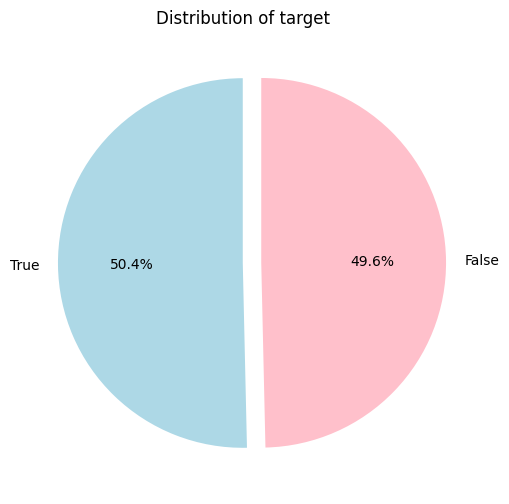

In [407]:
# distribution of target
trans_coun = data['Transported'].value_counts()
print(trans_coun)

# visualize dist of target
plt.figure(figsize=(6,6))
plt.pie(trans_coun, labels=['True','False'], autopct='%1.1f%%',startangle=90,explode=[0,0.1],colors=['lightblue','pink'])
plt.title('Distribution of target')
plt.show()

This shows the target is highly balanced

 **Age:**

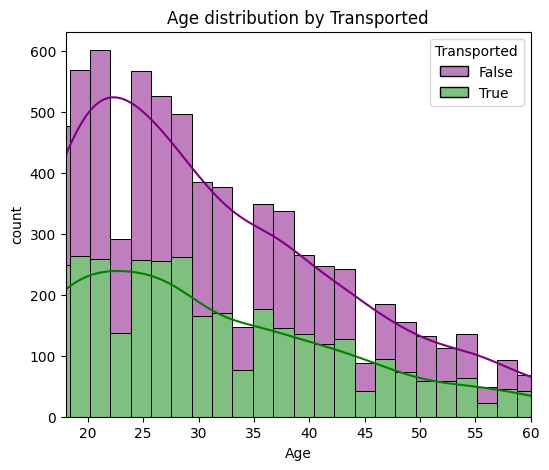

In [408]:
# visualization of age
plt.figure(figsize=(6,5))
sns.histplot(data=data, x='Age',hue='Transported',multiple='stack',kde=True,palette=['purple','green'])
plt.xlim(18,60)
plt.title('Age distribution by Transported')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

We observe that younger people are more likely to be transported

In [409]:
# check for 'age' counts
data['Age'].value_counts()

,count
Age,
24.0,324
18.0,320
21.0,311
19.0,293
23.0,292
...,...
72.0,4
78.0,3
79.0,3


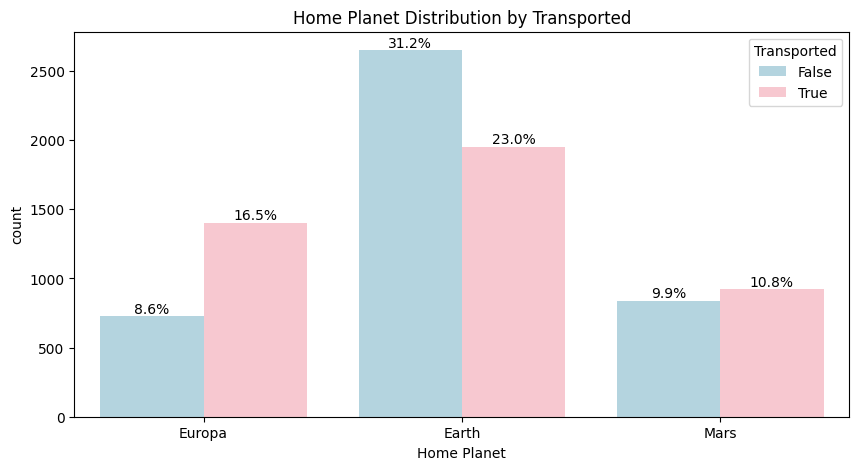

In [410]:
plt.figure(figsize=(10,5))
planet_plot = sns.countplot(data=data,x='HomePlanet',hue='Transported',  palette=['lightblue','pink'])
plt.title('Home Planet Distribution by Transported')
plt.xlabel('Home Planet')
plt.ylabel('count')
plt.xticks(rotation=0)
planet_count = data['HomePlanet'].value_counts()
total_planet = planet_count.sum()
for patch in planet_plot.patches:
  height = patch.get_height()
  if height > 0:
    percentage = (height/total_planet) * 100
    planet_plot.annotate(f'{percentage:.1f}%',
                         (patch.get_x() + patch.get_width() / 2, height),
                         ha='center',va='bottom',fontsize=10)
plt.show()

In [411]:
# check for 'passengerId' counts
data['PassengerId'].value_counts()

,count
PassengerId,
0001_01,1
6136_01,1
6141_01,1
6139_06,1
6139_05,1
...,...
3126_01,1
3124_03,1
3124_02,1


**Group size:**

In [412]:
# seprate group size
data['Group_size'] = data['PassengerId'].apply(lambda x: x.split('_')[1])


In [413]:
data['Group_size'].value_counts()

,count
Group_size,
01,6217
02,1412
03,571
04,231
05,128
06,75
07,46
08,13


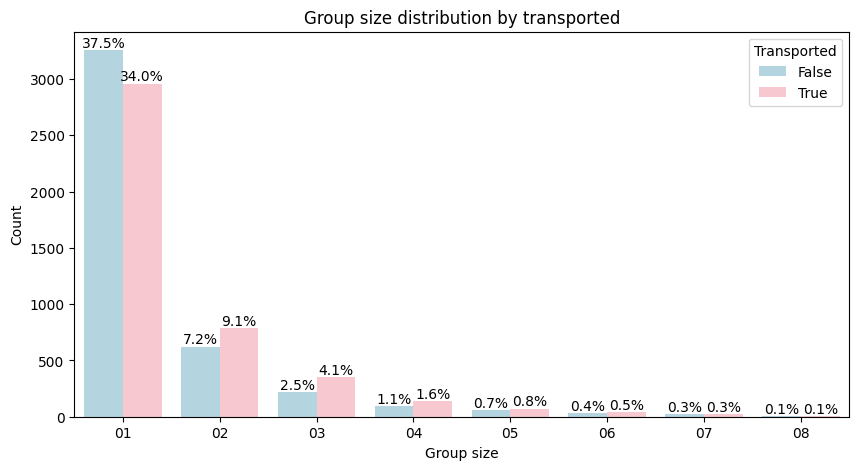

In [414]:
# visualize 'Group_size' by 'transported'
plt.figure(figsize=(10,5))
ax = sns.countplot(data=data,x='Group_size',hue='Transported',palette=['lightblue','pink'])
plt.title('Group size distribution by transported')
plt.xlabel('Group size')
plt.ylabel('Count')
plt.xticks(rotation=0)
group_plot = data['Group_size'].value_counts()
total_group = group_plot.sum()
for patch in ax.patches:
  height = patch.get_height()
  if height > 0:
    percentage = (height/total_group) * 100
    ax.annotate(f'{percentage:.1f}%',
                        (patch.get_x() + patch.get_width() / 2, height),
                        ha='center',va='bottom',fontsize=10)
plt.show()

In [415]:
data['Group_size'] = data['Group_size'].astype(int)

In [416]:
data['Destination'].value_counts()

,count
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796


In [417]:
# convert categorial (false, true) to numeric (6, 8)
data['VIP'] = data['VIP'].replace({'False': 6,'True': 8}).astype(float)

In [418]:
# convert categorial to numeric and split cabin deck
data['Destination'] = data['Destination'].replace({'TRAPPIST-1e' : 13,'PSO J318.5-22' : 15,'55 Cancri e' : 17}).astype(float)
data['Cabin_deck'] = data['Cabin'].str.split('/').str[0]
data['Cabin_deck'] = data['Cabin_deck'].replace({'F' : 21,'G':23,'E':25,'B':27,'C':28,'D':29,'A':31,'T':33}).astype(float)

In [419]:
#split cabin no, side
data['Cabin_no']  = data['Cabin'].str.split('/').str[1]
data['Cabin_side'] = data['Cabin'].str.split('/').str[2]

In [420]:
data['Cabin_side'] = data['Cabin_side'].replace({'S':37,'P': 39}).astype(float)
data['Cabin_no'] = data['Cabin_no'].astype(float)
data = data.drop(columns=['Cabin'],axis=1)

In [421]:
data['CryoSleep'].isna().sum()

217

In [425]:
data['HomePlanet'] = data['HomePlanet'].replace({'Europa':43,'Earth': 46,'Mars': 48})
data['CryoSleep'] = data['CryoSleep'].replace({False: 52,True: 53})

In [426]:
data['CryoSleep'].value_counts()

,count
CryoSleep,
52.0,5439
53.0,3037


In [427]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group_size,Cabin_deck,Cabin_no,Cabin_side
0,0001_01,43.0,52.0,13.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,27.0,0.0,39.0
1,0002_01,46.0,52.0,13.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,21.0,0.0,37.0
2,0003_01,43.0,52.0,13.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,31.0,0.0,37.0
3,0003_02,43.0,52.0,13.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,2,31.0,0.0,37.0
4,0004_01,46.0,52.0,13.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,21.0,1.0,37.0


In [428]:
# create a subset of data
num_lis = ['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Cabin_deck','Cabin_no','Cabin_side']


In [429]:
rest = list(set(data.columns) - set(num_lis))

In [430]:
data_rest = data[rest]

In [431]:
data[num_lis].isna().sum()

,0
HomePlanet,201
CryoSleep,217
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208
Spa,183
VRDeck,188


In [432]:
from sklearn.impute import KNNImputer

In [433]:
knn = KNNImputer()

In [434]:
kn = knn.fit_transform(data[num_lis])

In [435]:
kn_df = pd.DataFrame(kn,columns=num_lis)

In [436]:
new_data = pd.concat([data_rest.reset_index(drop=True),kn_df.reset_index(drop=True)],axis=1)

In [437]:
new_data.isna().sum()

,0
Group_size,0
PassengerId,0
Transported,0
Name,200
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0


In [438]:
# create a subset of expenditure from data
bill_col = ['RoomService','ShoppingMall','FoodCourt','Spa','VRDeck']

In [439]:
new_data['amt_spt'] = new_data[bill_col].sum(axis=1)

In [440]:
new_data['std_amt'] = new_data[bill_col].std(axis=1)

In [441]:
new_data['mean_amt'] = new_data[bill_col].mean(axis=1)

In [442]:
new_data.head()

,Group_size,PassengerId,Transported,Name,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_no,Cabin_side,amt_spt,std_amt,mean_amt
0,1,0001_01,False,Maham Ofracculy,43.0,52.0,13.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,39.0,0.0,0.000000,0.0
1,1,0002_01,True,Juanna Vines,46.0,52.0,13.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,21.0,0.0,37.0,736.0,227.807375,147.2
2,1,0003_01,False,Altark Susent,43.0,52.0,13.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,31.0,0.0,37.0,10383.0,3013.383198,2076.6
3,2,0003_02,False,Solam Susent,43.0,52.0,13.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,31.0,0.0,37.0,5176.0,1373.410427,1035.2
4,1,0004_01,True,Willy Santantines,46.0,52.0,13.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,21.0,1.0,37.0,1091.0,223.988169,218.2


In [443]:
# drop unwanted columns
new_data = new_data.drop(columns=['Name','PassengerId'],axis=1)

In [444]:
# encode target variable
new_data['Transported'] = new_data['Transported'].replace({True: 1,False: 0})

In [445]:
data1 = new_data

In [446]:
data1.head()

,Group_size,Transported,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_no,Cabin_side,amt_spt,std_amt,mean_amt
0,1,0,43.0,52.0,13.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,39.0,0.0,0.000000,0.0
1,1,1,46.0,52.0,13.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,21.0,0.0,37.0,736.0,227.807375,147.2
2,1,0,43.0,52.0,13.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,31.0,0.0,37.0,10383.0,3013.383198,2076.6
3,2,0,43.0,52.0,13.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,31.0,0.0,37.0,5176.0,1373.410427,1035.2
4,1,1,46.0,52.0,13.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,21.0,1.0,37.0,1091.0,223.988169,218.2


In [447]:
data1.corr()

,Group_size,Transported,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_no,Cabin_side,amt_spt,std_amt,mean_amt
Group_size,1.000000,0.066390,-0.083070,0.065530,0.034104,-0.132647,0.000514,-0.022871,0.025640,-0.038999,0.017108,0.009813,0.101222,-0.041236,-0.010390,0.011708,0.005359,0.011708
Transported,0.066390,1.000000,-0.126962,0.464813,0.109761,-0.073266,-0.038130,-0.242364,0.044295,0.007464,-0.219824,-0.205340,0.103867,-0.048108,-0.102031,-0.201217,-0.172974,-0.201217
HomePlanet,-0.083070,-0.126962,1.000000,-0.059547,-0.259971,-0.159632,-0.089905,0.170410,-0.336567,0.069414,-0.245092,-0.268789,-0.655902,0.403801,0.037539,-0.343165,-0.323104,-0.343165
CryoSleep,0.065530,0.464813,-0.059547,1.000000,0.095927,-0.075869,-0.083106,-0.251582,-0.209952,-0.214906,-0.204632,-0.198669,0.070951,-0.038673,-0.018925,-0.386459,-0.384859,-0.386459
Destination,0.034104,0.109761,-0.259971,0.095927,1.000000,0.007141,0.041932,-0.048187,0.109668,-0.025781,0.056743,0.072359,0.181758,-0.108393,-0.009008,0.097462,0.092106,0.097462
Age,-0.132647,-0.073266,-0.159632,-0.075869,0.007141,1.000000,0.091590,0.068408,0.128767,0.034950,0.123127,0.101986,0.191648,-0.133141,-0.009049,0.187227,0.179914,0.187227
VIP,0.000514,-0.038130,-0.089905,-0.083106,0.041932,0.091590,1.000000,0.059038,0.125540,0.019712,0.060377,0.126310,0.167914,-0.097582,0.008828,0.164630,0.155622,0.164630
RoomService,-0.022871,-0.242364,0.170410,-0.251582,-0.048187,0.068408,0.059038,1.000000,-0.014349,0.058817,0.011515,-0.019428,0.007949,-0.008967,0.011081,0.236342,0.225425,0.236342
FoodCourt,0.025640,0.044295,-0.336567,-0.209952,0.109668,0.128767,0.125540,-0.014349,1.000000,-0.012400,0.223047,0.225542,0.287999,-0.181403,-0.019456,0.742811,0.754638,0.742811
ShoppingMall,-0.038999,0.007464,0.069414,-0.214906,-0.025781,0.034950,0.019712,0.058817,-0.012400,1.000000,0.018077,-0.006692,-0.005730,0.002391,0.019878,0.224212,0.216293,0.224212


In [449]:
data1['3_high_col'] = data1['CryoSleep']+ data1['Destination']+ data1['Cabin_deck']
data1['3_low_col'] = data1['std_amt'] + data1['amt_spt'] + data1['mean_amt']

In [450]:
data1.corr()['Transported'].sort_values(ascending=False)

,Transported
Transported,1.000000
CryoSleep,0.464813
3_high_col,0.192150
Destination,0.109761
Cabin_deck,0.103867
Group_size,0.066390
FoodCourt,0.044295
ShoppingMall,0.007464
VIP,-0.038130
Cabin_no,-0.048108


In [451]:
# split the data in feature and target
X = data1.drop(columns=['Transported'],axis=1)
Y = data1['Transported']

In [452]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=2)

In [453]:
len(X_train)

6954

In [454]:
len(X_test)

1739

In [455]:
# load the scaler to standardized data
sacler = StandardScaler()

In [456]:
X_train = sacler.fit_transform(X_train)
X_test = sacler.transform(X_test)

In [463]:
model_gb = GradientBoostingClassifier()

In [464]:
model_gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [495]:
gb_pred = model_gb.predict(X_test)
tes_acc = accuracy_score(gb_pred, Y_test)
print('test accuracy :',tes_acc)

test accuracy : 0.8125359401955147


In [496]:
print('Classification Report:')
print(classification_report(gb_pred,Y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       843
           1       0.83      0.81      0.82       896

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [497]:
mat_gb = confusion_matrix(gb_pred,Y_test)
print(mat_gb)

[[690 153]
 [173 723]]


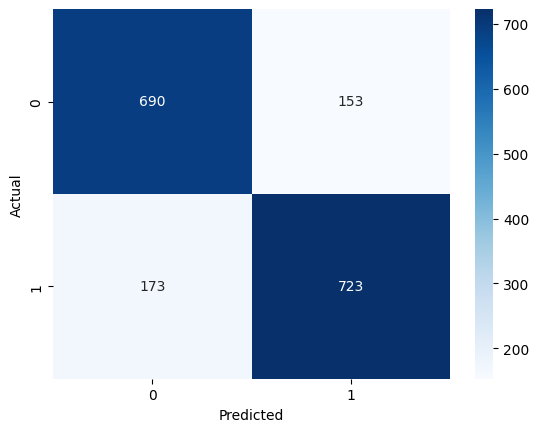

In [498]:
sns.heatmap(mat_gb,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [467]:
# model loading lgbm
model_lig = LGBMClassifier(verbose=-1)

In [468]:
model_lig.fit(X_train,Y_train)

LGBMClassifier(verbose=-1)

In [471]:
lig_pred = model_lig.predict(X_test)
tes_acc = accuracy_score(lig_pred, Y_test)
print('test accuracy :',tes_acc)

test accuracy : 0.81196089706728


In [472]:
print('Classification Report:')
print(classification_report(lig_pred,Y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       866
           1       0.81      0.81      0.81       873

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [493]:
mat_lig = confusion_matrix(lig_pred,Y_test)
print(mat_lig)

[[701 165]
 [162 711]]


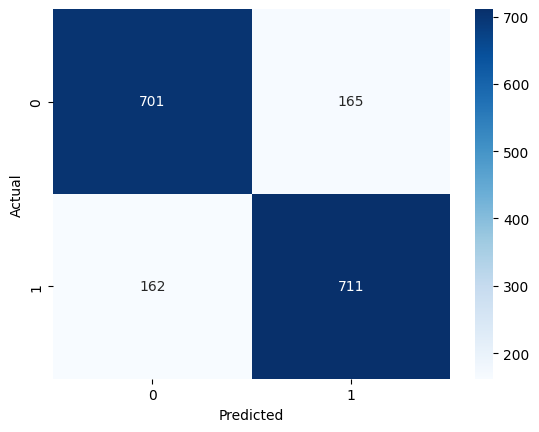

In [499]:
sns.heatmap(mat_lig,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [473]:
# model loading xgb
model_xg = XGBClassifier()

In [474]:
model_xg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [477]:
xg_pred = model_xg.predict(X_test)
tes_acc = accuracy_score(xg_pred, Y_test)
print('test acc :',tes_acc)

test acc : 0.8085106382978723


In [478]:
print('Classification Report:')
print(classification_report(xg_pred,Y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       860
           1       0.81      0.81      0.81       879

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [491]:
mat_xg = confusion_matrix(xg_pred,Y_test)
print(mat_xg)

[[695 165]
 [168 711]]


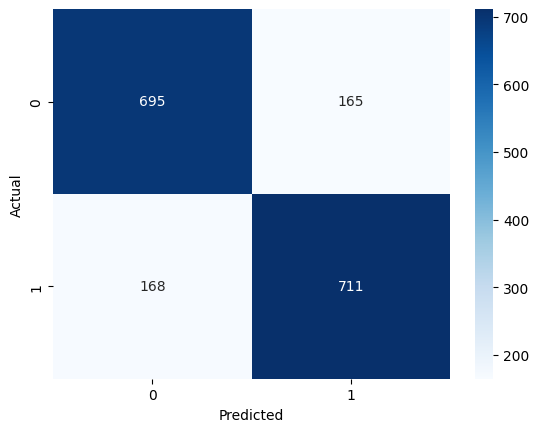

In [500]:
sns.heatmap(mat_xg,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [479]:
# model loading svc
model_sv = SVC()

In [480]:
model_sv.fit(X_train,Y_train)

SVC()

In [484]:
sv_pred = model_sv.predict(X_test)
tes_acc = accuracy_score(sv_pred, Y_test)
print('test accuracy:',tes_acc)

test accuracy: 0.8073605520414031


In [486]:
print('Classification Report:')
print(classification_report(sv_pred,Y_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       860
           1       0.81      0.81      0.81       879

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [488]:
mat_sv = confusion_matrix(sv_pred,Y_test)
print(mat_sv)

[[694 166]
 [169 710]]


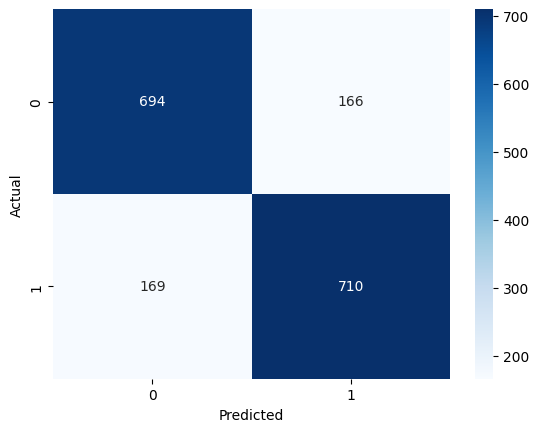

In [501]:
sns.heatmap(mat_sv,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()